# Сегментация потребителей (леденцы)

Одной из задач сегментации потребителей является классификация их по потребностям. Такая сегментация позволяет выявить, какие бренды популярны среди представителей различных сегментов, а также определить, как можно модифицировать продукцию компании для удовлетворения потребностей наиболее привлекательных сегментов. С точки зрения маркетологов, сегменты должны быть интерпретируемыми, измеримыми и достаточно крупными. Как правило, сегментация является частью более масштабного маркетингового исследования.

Набор данных содержит оценки степени согласия респондентов с высказываниями, отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 11 высказываниям:
* V1: я потребляю леденцы, чтобы освежить дыхание
* V2: я потребляю леденцы, чтобы чувствовать себя увереннее
* V3: я потребляю леденцы, чтобы освежить полость рта
* V4: я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту
* V5: я потребляю леденцы как заменитель других кондитерских изделий
* V6: я потребляю леденцы, когда мне хочется чего-нибудь сладкого
* V7: леденцы помогают мне сконцентрироваться
* V8: я потребляю леденцы, чтобы отвлечься на несколько минут и подумать
* V9: я потребляю леденцы для того, чтобы облегчить боль в горле
* V10: я потребляю леденцы для того, чтобы избавиться от заложенности носа
* V11: я потребляю леденцы для улучшения самочувствия

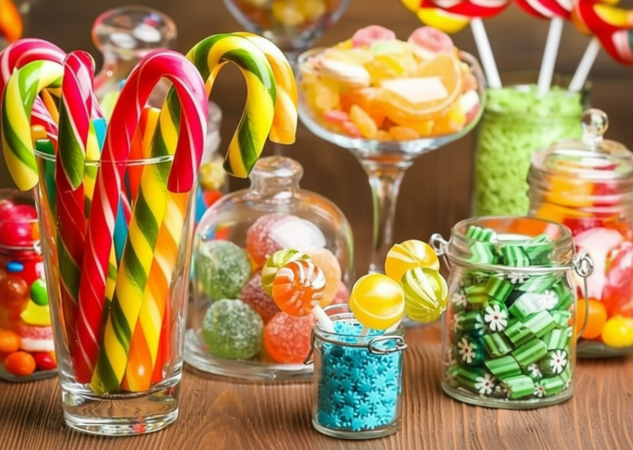

# Подгрузка библиотек

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

RANDOM_STATE = 42

# EDA

In [4]:
data = pd.read_csv('lollipops.csv', delimiter=';')

In [5]:
data.shape

(338, 11)

In [6]:
data[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


Оценочная шкала:

In [8]:
data.apply(lambda x: sorted(x.unique()))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,2,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,3
2,4,4,4,4,4,4,4,4,4,4,4
3,5,5,5,5,5,5,5,5,5,5,5


Статистики:

In [9]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


> * Средние значения по всем вопросам находятся в диапазоне от 3.20 до 3.60, что близко к середине шкалы оценивания.
> * Стандартные отклонения по всем вопросам находятся в диапазоне от 0.82 до 0.99, что указывает на умеренную вариативность ответов (есть разнообразие мнений).
> * Медиана равна 3.
> * 75% ответов у V5, V6, V7, V8 имеют низкую удовлетворенность.

Визуализация распределений ответов по вопросам:

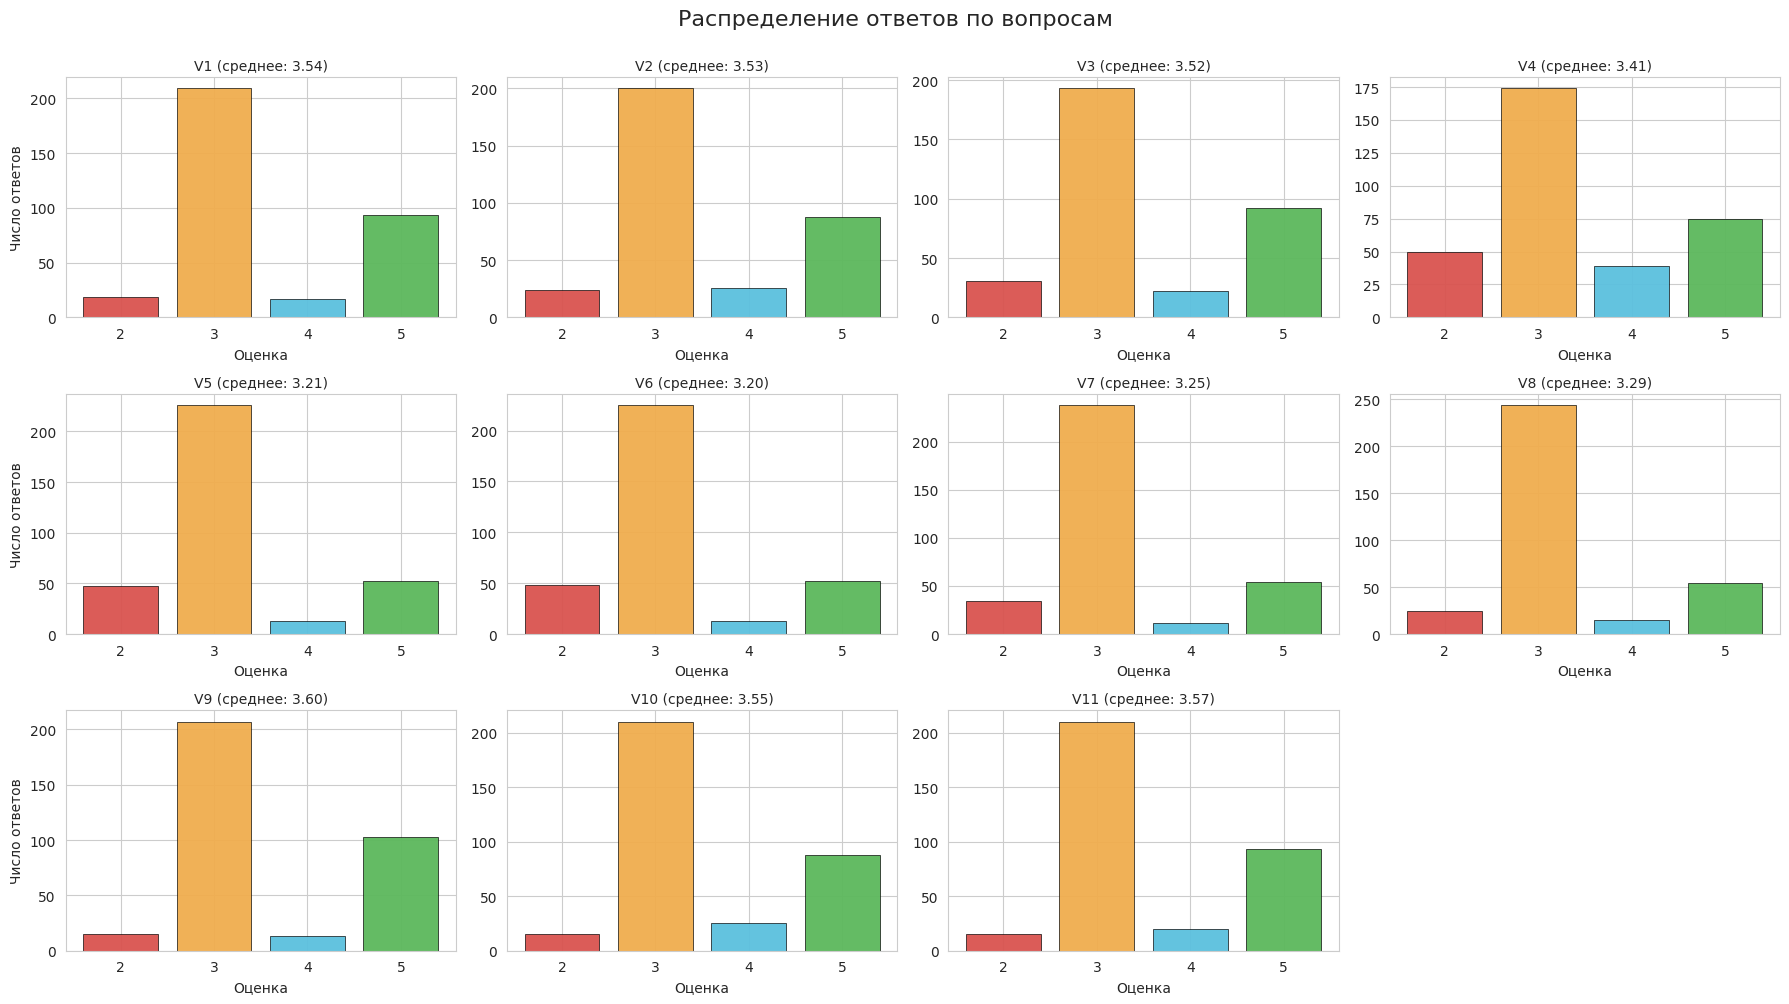

In [10]:
questions_list = [f'V{i}' for i in range(1, 12)]

sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
axes = axes.ravel()

colors = ['#d9534f', '#f0ad4e', '#5bc0de', '#5cb85c']

for i, col in enumerate(questions_list):
    if i < len(axes):
        counts = data[col].value_counts().reindex([2, 3, 4, 5], fill_value=0)
        bars = axes[i].bar(counts.index, counts.values, color=colors, alpha=0.95, edgecolor='black', linewidth=0.5)

        axes[i].set_title(f'{col} (среднее: {data[col].mean():.2f})', fontsize=10, pad=5)

        axes[i].set_xlabel('Оценка')
        axes[i].set_xticks([2, 3, 4, 5])

        if i % 4 == 0:
            axes[i].set_ylabel('Число ответов', fontsize=10)
        else:
            axes[i].set_ylabel('')

fig.delaxes(axes[11])
plt.suptitle('Распределение ответов по вопросам', fontsize=16, y=1)
plt.tight_layout()
plt.show()

Корреляция признаков:

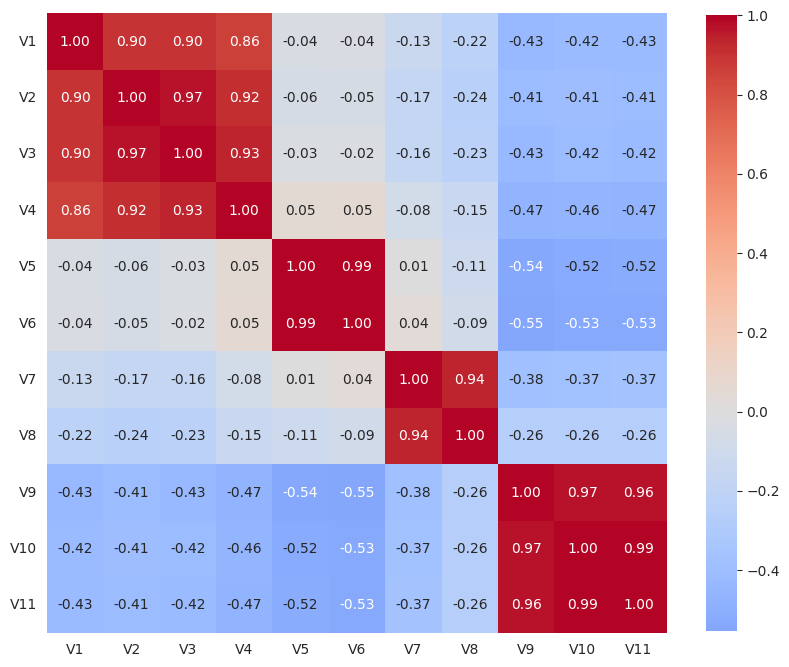

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': .8})

plt.yticks(rotation=0)
plt.show()

Поскольку все переменные представляют собой оценки по одной и той же шкале, их масштабы изначально сопоставимы, то есть кластеризация может быть проведена без предварительной стандартизации.

Тем не менее, после применения стандартизации отмечено небольшое улучшение качества кластеризации:
* Визуальная структура на t-SNE становится чётче
* Коэффициент силуэта немного увеличивается

Таким образом, хотя стандартизация не является строго необходимой, но она позволяет алгоритмам работать немного стабильнее и эффективнее, особенно в случае использования метрик на основе расстояний.

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Визуализация данных с помощью t-SNE:

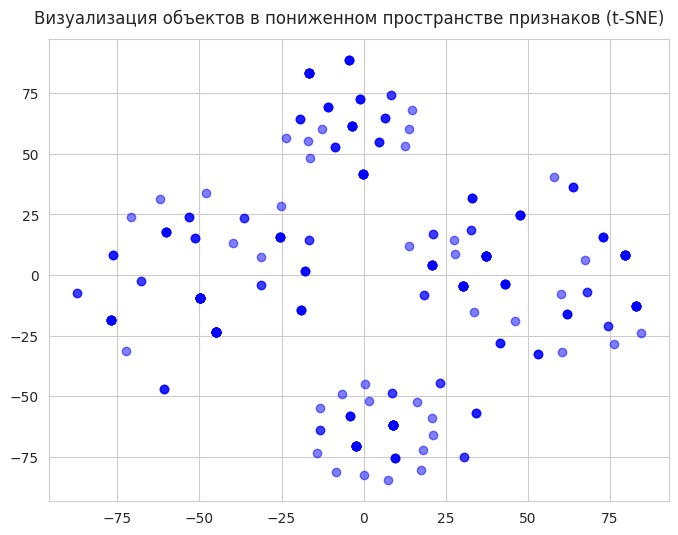

In [13]:
tsne = TSNE(
    n_components=2,
    perplexity=50,
    random_state=RANDOM_STATE,
    max_iter=500
)

data_tsne = tsne.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c='blue', alpha=0.5)
plt.suptitle('Визуализация объектов в пониженном пространстве признаков (t-SNE)', y=0.93)
plt.show()

> Анализ матрицы корреляции выявляет четыре группы признаков, характеризующиеся высокой степенью линейной зависимости внутри каждой группы.
Дополнительно, визуализация с помощью t-SNE демонстрирует четыре чётко выраженных скопления точек, что также предполагает существование четырёх кластеров.
На основании этого, для кластерного анализа были выбраны `Ward’s method` и алгоритм `K-means` $-$ оба метода ориентированы на выделение компактных, сферических кластеров, что соответствует наблюдаемой структуре данных.

# Кластеризация

## Ward’s method

In [14]:
data_ward = data.copy()

In [15]:
%%time
link = linkage(data_scaled, 'ward', 'euclidean')

CPU times: user 5.32 ms, sys: 86 µs, total: 5.41 ms
Wall time: 7.64 ms


In [16]:
link.shape

(337, 4)

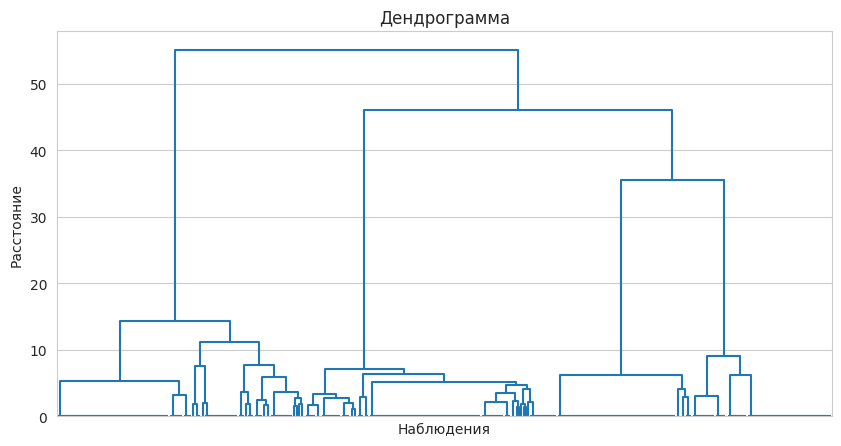

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Дендрограмма')
plt.xlabel('Наблюдения')
plt.ylabel('Расстояние')

dn = dendrogram(
    link,
    no_labels=True,
    color_threshold=-1
)

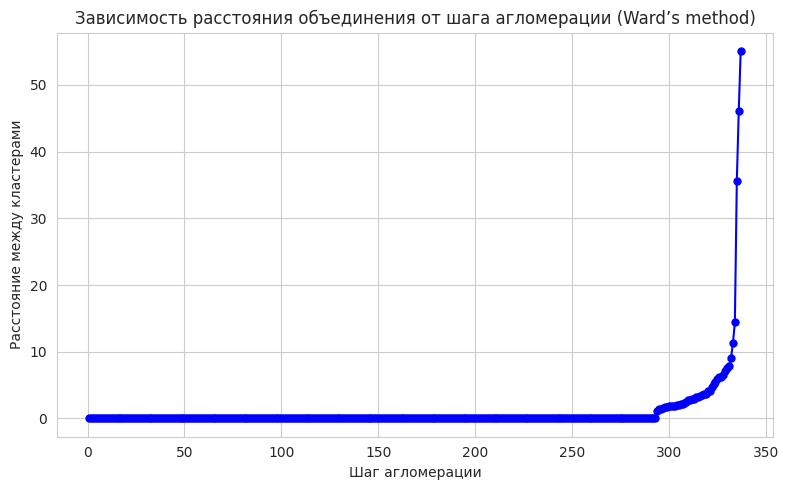

In [18]:
distances = link[:, 2]
steps = range(1, len(distances) + 1)

plt.figure(figsize=(8, 5))
plt.plot(steps, distances, 'bo-', markersize=5)
plt.title('Зависимость расстояния объединения от шага агломерации (Ward’s method)')
plt.xlabel('Шаг агломерации')
plt.ylabel('Расстояние между кластерами')
plt.tight_layout()
plt.show()

> * Для выделения кластеров было выбрано пороговое значение расстояния, равное 20.
> * При разрезании дерева иерархической кластеризации на этом уровне выделяется 4 отдельных кластера.

In [19]:
distance_threshold = 20
ward_labels = fcluster(link, distance_threshold, criterion='distance')
data_ward['Ward_label'] = ward_labels

# n_clusters = 4
# ward_labels = fcluster(link, n_clusters, criterion='maxclust')
# data_ward['Ward_label'] = ward_labels

## K-means

In [20]:
data_kmeans = data.copy()

In [21]:
k_range = range(1, 16)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    print(f'k: {k} | n_iter: {kmeans.n_iter_}')

k: 1 | n_iter: 2
k: 2 | n_iter: 3
k: 3 | n_iter: 3
k: 4 | n_iter: 2
k: 5 | n_iter: 3
k: 6 | n_iter: 2
k: 7 | n_iter: 2
k: 8 | n_iter: 4
k: 9 | n_iter: 2
k: 10 | n_iter: 4
k: 11 | n_iter: 3
k: 12 | n_iter: 3
k: 13 | n_iter: 3
k: 14 | n_iter: 3
k: 15 | n_iter: 3


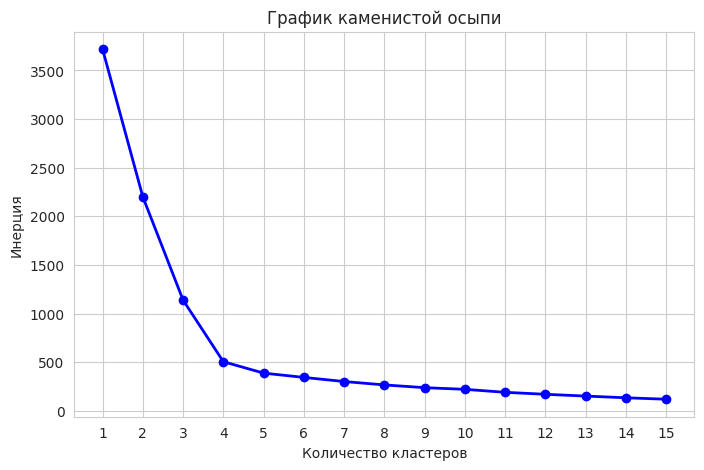

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
plt.title('График каменистой осыпи')
plt.xlabel('Количество кластеров')
plt.xticks(k_range)
plt.ylabel('Инерция')
plt.show()

In [23]:
%%time
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=RANDOM_STATE)
kmeans.fit(data_scaled)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 14.1 ms


KMeans(n_clusters=4, n_init=5, random_state=42)

In [24]:
KMeans_labels = kmeans.labels_
data_kmeans['KMeans_label'] = KMeans_labels

# Сравнение результатов кластеризации и интерпретация кластеров

In [25]:
data_ward['Ward_label'].value_counts()

,count
Ward_label,
2,110
1,108
4,61
3,59


In [26]:
data_kmeans['KMeans_label'].value_counts()

,count
KMeans_label,
2,110
0,108
1,61
3,59


In [27]:
ward_cluster_means = (
    data_ward.groupby('Ward_label')
    .mean()
    .round(2)
)

KMeans_cluster_means = (
    data_kmeans.groupby('KMeans_label')
    .mean()
    .round(2)
)

In [28]:
ward_cluster_means

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
Ward_label,,,,,,,,,,,
1,2.82,2.83,2.77,2.62,2.61,2.58,2.75,2.92,4.95,4.81,4.86
2,4.85,4.80,4.84,4.68,3.04,3.04,3.00,2.99,3.07,3.05,3.05
3,3.00,2.97,2.97,2.92,2.92,2.95,4.92,4.92,3.00,3.00,3.00
4,3.00,3.00,3.00,3.00,4.85,4.85,3.00,2.92,2.75,2.75,2.75


In [29]:
KMeans_cluster_means

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
KMeans_label,,,,,,,,,,,
0,2.82,2.83,2.77,2.62,2.61,2.58,2.75,2.92,4.95,4.81,4.86
1,3.00,3.00,3.00,3.00,4.85,4.85,3.00,2.92,2.75,2.75,2.75
2,4.85,4.80,4.84,4.68,3.04,3.04,3.00,2.99,3.07,3.05,3.05
3,3.00,2.97,2.97,2.92,2.92,2.95,4.92,4.92,3.00,3.00,3.00


In [30]:
ari = adjusted_rand_score(ward_labels, KMeans_labels)
print(f'Индекс скорректированного совпадения Рэнда: {ari:.2f}')

Индекс скорректированного совпадения Рэнда: 1.00


In [31]:
kmeans0 = KMeans(n_clusters=4, n_init=5, random_state=RANDOM_STATE)
kmeans0.fit(data)

print(
    f'Коэффициент силуэта (Ward’s method/data scaled): {silhouette_score(data_scaled, ward_labels)}',
    f'Коэффициент силуэта (K-means/data scaled): {silhouette_score(data_scaled, KMeans_labels)}',
    f'Коэффициент силуэта (K-means/data): {silhouette_score(data, kmeans0.labels_)}',
    sep=2*'\n'
)

Коэффициент силуэта (Ward’s method/data scaled): 0.73177829395751

Коэффициент силуэта (K-means/data scaled): 0.73177829395751

Коэффициент силуэта (K-means/data): 0.7265095702205504


> K-Means и Ward’s method нашли одни и те же кластеры (метки кластеров совпадают, ARI = 1) $-$ и оба дали отличный коэффициент силуэта = 0.73, то есть структура в данных реальная, а не артефакт метода.
Хотя K-Means обычно считается быстрее, но в данном случае Ward’s method показал лучшее время выполнения. Ward’s method также предпочтительнее с точки зрения интерпретации: дендрограмма позволяет визуально обосновать выбор k.
Учитывая, что результаты кластеризации идентичны, выбор пал на Ward’s method как на более прозрачный и объяснимый метод.

Теперь интерпретируем кластеры на основе профилей ответов и дадим им содержательные названия, чтобы сделать результаты полезными для бизнеса:

In [32]:
ward_label_proportion  = (
    data_ward.Ward_label
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

cluster_names = {
    1: 'Лечебно-оздоровительный',
    2: 'Гигиена и свежесть',
    3: 'Когнитивный/Ментальный фокус',
    4: 'Замена сладкому'
}

df_clusters = pd.DataFrame({
    'cluster_number': cluster_names.keys(),
    'cluster_name': cluster_names.values(),
    'respondents(%)': ward_label_proportion.values
})

df_clusters = df_clusters.set_index('cluster_number')

df_clusters

,cluster_name,respondents(%)
cluster_number,,
1,Лечебно-оздоровительный,31.95
2,Гигиена и свежесть,32.54
3,Когнитивный/Ментальный фокус,17.46
4,Замена сладкому,18.05


# Силуэтный анализ

Чтобы глубже оценить качество кластеризации и степень компактности и разделённости кластеров, построим график коэффициента силуэта:

In [33]:
# Считаем силуэты
silhouette_avg = silhouette_score(data_scaled, ward_labels)
sample_silhouette_values = silhouette_samples(data_scaled, ward_labels)

In [34]:
def plot_silhouette(labels, sample_silhouette_vals, silhouette_avg,
                    len_data=len(data_ward), n_clusters=4):

    plt.figure(figsize=(10, 5))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len_data + (n_clusters + 1) * 10])
    plt.title(f'График силуэта (Ward, n_clusters={n_clusters})')
    plt.xlabel('коэффициент силуэта')
    plt.ylabel('кластер')
    plt.yticks([])
    plt.xticks(np.arange(-0.1, 1.05, 0.1))

    y_lower = 10
    for i in range(1, n_clusters + 1):

        cluster_vals = sample_silhouette_vals[labels == i]
        cluster_vals.sort()
        size = cluster_vals.shape[0]
        y_upper = y_lower + size
        color = cm.nipy_spectral(i / n_clusters)

        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0, cluster_vals,
            facecolor=color, edgecolor='k', alpha=0.7, linewidth=0.3
        )

        plt.text(-0.05, y_lower + 0.5 * size, str(i),
                fontsize=11, ha='center', va='center')

        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color='red')
    plt.text(
        silhouette_avg + 0.02, 15,
        f'среднее: {silhouette_avg:.3f}',
        color='red', fontsize=12
    )

    plt.tight_layout()
    plt.show()

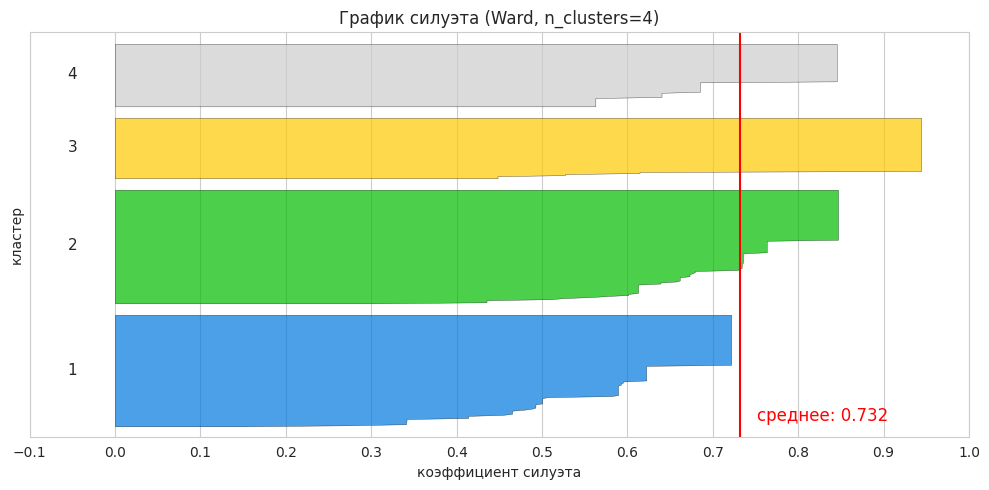

In [35]:
plot_silhouette(ward_labels, sample_silhouette_values, silhouette_avg)

> На графике силуэта заметно, что в кластере 1 значения коэффициента для всех точек находятся ниже общего среднего значения (обозначенного красной линией), что указывает на менее чёткое выделение данного кластера. В остальных кластерах ситуация значительно лучше — большинство точек имеют коэффициент силуэта выше среднего, что свидетельствует о более высоком качестве кластеризации.
По ширине полосок видно, что кластеры с большим количеством точек визуально шире, что отражает их размер. Некоторые кластеры демонстрируют "зубчатую" структуру, обусловленную вариативностью значений силуэта внутри кластера, что может указывать на определённую неоднородность.

In [36]:
# Найдём индексы точек с силуэтом ниже заданного порога
low_silhouette_threshold = 0.5
outlier_indices = np.where(sample_silhouette_values < low_silhouette_threshold)[0]
percentage = len(outlier_indices) / data.shape[0] * 100

print(
    f'Найдено {len(outlier_indices)} точек с силуэтом < {low_silhouette_threshold}',
    f'Это {percentage:.2f}% от всех данных',
    sep='\n'
)

Найдено 29 точек с силуэтом < 0.5
Это 8.58% от всех данных


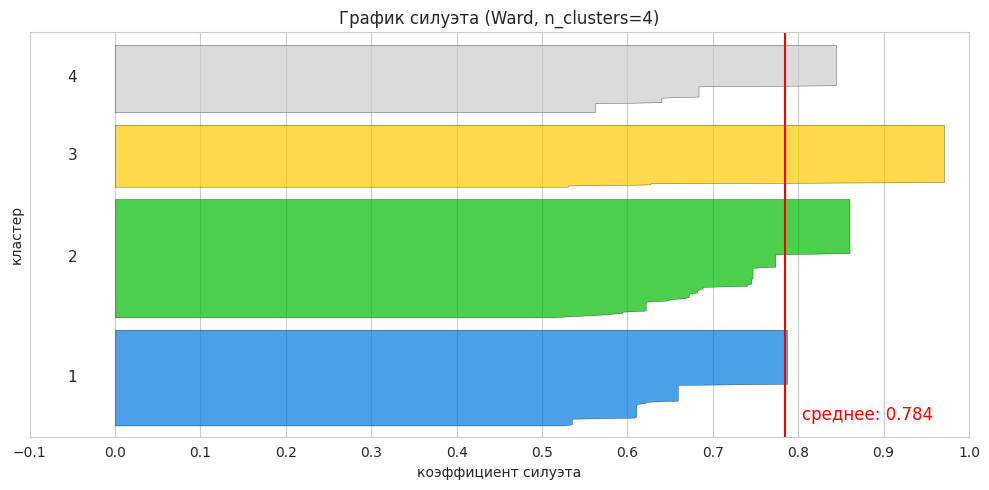

In [37]:
# Чистим данные от найденных точек
data_ward_clean = data.drop(outlier_indices, axis=0).copy()
data_scaled_clean = np.delete(data_scaled, outlier_indices, axis=0).copy()

# Кластеризация
n_clusters = 4
link = linkage(data_scaled_clean, 'ward', 'euclidean')
ward_labels_clean = fcluster(link, n_clusters, criterion='maxclust')
data_ward_clean['Ward_label'] = ward_labels_clean

# Коэффициент силуэта
new_silhouette_avg = silhouette_score(data_scaled_clean, ward_labels_clean)
new_sample_silhouette_values = silhouette_samples(data_scaled_clean, ward_labels_clean)

plot_silhouette(
    ward_labels_clean, new_sample_silhouette_values,
    new_silhouette_avg, len_data=len(data_ward_clean)
)

> После удаления точек, коэффициент силуэта которых был ниже заданного порогового значения, удалось повысить средний коэффициент силуэта и немного снизить вариативность внутри кластера 1. В результате во всех кластерах большинство точек демонстрируют высокое значение коэффициента силуэта.

In [38]:
# Посмотрим на точки, выделенные с помощью силуэта по порогу
data_ward.iloc[outlier_indices]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Ward_label
52,4,4,4,4,3,3,3,4,4,3,3,2
66,5,5,5,4,4,4,3,3,4,4,4,2
71,5,5,5,4,4,4,3,3,4,4,4,2
80,5,5,5,4,4,4,3,3,4,4,4,2
112,2,4,4,4,2,2,2,3,5,5,5,1
139,2,4,4,4,2,2,2,3,5,5,5,1
170,3,2,2,2,3,3,4,4,5,5,5,1
177,2,4,4,4,2,2,2,3,5,4,4,1
178,3,2,2,2,3,2,2,3,5,4,4,1
182,3,3,2,2,2,2,3,3,5,4,4,1


In [39]:
data_ward_clean.groupby('Ward_label').mean().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
Ward_label,,,,,,,,,,,
1,2.88,2.85,2.83,2.64,2.67,2.65,2.67,2.81,5.00,4.92,4.92
2,4.85,4.80,4.84,4.71,3.01,3.01,3.00,2.98,3.04,3.02,3.02
3,3.00,2.96,2.96,2.96,2.96,3.00,4.96,4.96,3.00,3.00,3.00
4,3.00,3.00,3.00,3.00,4.85,4.85,3.00,2.92,2.75,2.75,2.75


In [40]:
ward_cluster_means

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
Ward_label,,,,,,,,,,,
1,2.82,2.83,2.77,2.62,2.61,2.58,2.75,2.92,4.95,4.81,4.86
2,4.85,4.80,4.84,4.68,3.04,3.04,3.00,2.99,3.07,3.05,3.05
3,3.00,2.97,2.97,2.92,2.92,2.95,4.92,4.92,3.00,3.00,3.00
4,3.00,3.00,3.00,3.00,4.85,4.85,3.00,2.92,2.75,2.75,2.75


> Кластер 1 изначально характеризуется ожиданием высокой лояльности к признакам V9, V10 и V11 и нейтральных оценок по остальным признакам. Однако анализ коэффициента силуэта позволил выделить в составе этого кластера точки с аномальным поведением: часть пользователей демонстрирует избыточную лояльность ("энтузиасты"), в то время как другая часть — чрезмерную критичность ("критики").
В целом, кластеры 2 и 4 также демонстрируют определённую внутреннюю вариативность, однако их коэффициенты силуэта изначально были достаточно высокими, что свидетельствует о хорошей компактности и согласованности. Это означает, что влияние пользователей с нетипичным поведением — таких как "критики" и "энтузиасты" — на структуру этих кластеров было менее выраженным.